# The Battle of the Neighborhoods 
## Toronto Healthy Food - Juice Bar 

##### Α capstone project for IBM Data Science Professional Certificate 
Working on capstone project includes 
- The business problem and who would be interested in this project.
- Describe the data that will be used to solve the problem and the source of the data.
- Methodology section which represents the main component of the report.
- Describe any exploratory data analysis 
- Inferential statistical testing that performed
- Results section where you discuss the results.
- Analyse any observations you noted and any recommendations you can make based on the results.
- Conclusion section where you conclude the report.

The objective of this project will be to find locations with similar characteristics based on deferent creteria into clusters across the the city in order to locate best matching area (postal code based) φορ a Healthy Food - Juice Bar.

# Introduction
##  Business Problem

In this project, we are going to look for an optimal location to open a healthy food / fruit bar. Specifically, this report can provide a reference for stakeholders who are interested in opening a healthy / fruit bar based on places that gather people / potential customers (cyclists, athletes, people that go to the gym etc) at Toronto.
In this report, we will focus on all areas of Toronto analyzing 
- Areas that can have potential customers 
- Areas that already have similar business  

## Methodology 
In this project, we are going to look for an optimal location to open a healthy food / fruit bar. Specifically, this report can provide a reference for stakeholders who are interested in opening a healthy / fruit bar based on places that gather people / potential customers (cyclists, athletes, people that go to the gym etc) at Toronto.
In this report, we will focus on all areas of Toronto analyzing 
- Areas that can have potential customers 
- Areas that already have similar business 
We will analyze data and use a clustering model in order to find best mathing areas and where exist similar business
Then we will use deferent approaches using simple mean values and K-means analysis based on 
- number of target shops 
- capacity of places that gather targeted customers
We will use data science tools to fetch the raw data, visualize it then generate a few most promising areas based on the above criteria.

## Data
The data sets used are relevant to the targeted customer habits described, like bicycle parking spaces, athletes' shops etc. 
At step 1 "Download and Explore Dataset" more data can be added. The analysis and Python methods that used are 

- Folium library
- Foursquare APIs
- mean methodology 
- K-Means Clustering Algorithm
- Horizontal Bar Chart
- Pandas, Numpy, Shapely
   

In the meanwhile, we will also explain the advantage and traits for the candidates, so that stakeholders can make the final decision base on the analysis.
Based on the definition of our problem, factors that may impact our decision are:

- Demographic information, e.g. population
- Number of existing healthy food and Juice bars in the neighborhood and nearby
- Number of existing shops gyms and places that might potential customers might be interested
 
 

## data sources:
In this project, we will fetch or extract data from the following portal of Toronto Open Data (https://open.toronto.ca) and Foursquare https://foursquare.com


### Libraries 

In [1]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
from sklearn.cluster import KMeans
import folium 
!pip install geopy
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values
import numpy as np
from sklearn.datasets.samples_generator import make_blobs
import matplotlib.cm as cm
import matplotlib.colors as colors 
%matplotlib inline
import matplotlib.pyplot as plt 
import json # library to handle JSON files 
import requests # library to handle requests  

C:\Users\gregoryt\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


## 1. Download and Explore Dataset

We can add as many data set as we need in order to find more relevant places that we like. 
The perpose of that is to find more places that gather more people / potential customers meaning  as target group. Also find similar shops that provide same or similar services.

### Toronto area
The search is based on Toronto. Search by Postal Code

In [2]:
lat_lng_df=pd.read_csv('http://cocl.us/Geospatial_data')
lat_lng_df.rename(columns={'Postal Code':'POSTAL_CODE'},inplace=True)
#lat_lng_df

### 1.1 First data set
##### Foursquare api analysis
1. target places of interest
2. target similar services.


In [3]:
CLIENT_ID = 'V2EMHOOGYMMXYQIQFTK5PMPO0KTROHIOXU41P2XRP0P44440' # your Foursquare ID
CLIENT_SECRET = 'MFAS3MDNXHDAPKXXEZXMOMDBYPCFXVI2VK4KL3AXW5RGGZIO' # your Foursquare Secret
ACCESS_TOKEN = '' # your FourSquare Access Token
VERSION = '20180604'
address = 'Toronto, CA'

geolocator = Nominatim(user_agent="foursquare_agent")
location = geolocator.geocode(address)
 
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate o {} , {}'.format(latitude, longitude))

def getNearbyVenues(names, latitudes, longitudes):
    radius=500
    LIMIT=100
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

The geograpical coordinate o 43.6534817 , -79.3839347


In [4]:
GR_venues = getNearbyVenues(names=lat_lng_df['POSTAL_CODE'],
                                   latitudes=lat_lng_df['Latitude'],
                                   longitudes=lat_lng_df['Longitude']
                                  )

M1B
M1C
M1E
M1G
M1H
M1J
M1K
M1L
M1M
M1N
M1P
M1R
M1S
M1T
M1V
M1W
M1X
M2H
M2J
M2K
M2L
M2M
M2N
M2P
M2R
M3A
M3B
M3C
M3H
M3J
M3K
M3L
M3M
M3N
M4A
M4B
M4C
M4E
M4G
M4H
M4J
M4K
M4L
M4M
M4N
M4P
M4R
M4S
M4T
M4V
M4W
M4X
M4Y
M5A
M5B
M5C
M5E
M5G
M5H
M5J
M5K
M5L
M5M
M5N
M5P
M5R
M5S
M5T
M5V
M5W
M5X
M6A
M6B
M6C
M6E
M6G
M6H
M6J
M6K
M6L
M6M
M6N
M6P
M6R
M6S
M7A
M7R
M7Y
M8V
M8W
M8X
M8Y
M8Z
M9A
M9B
M9C
M9L
M9M
M9N
M9P
M9R
M9V
M9W


In [5]:
places = GR_venues.groupby('Venue Category')['Neighborhood'].apply(list)
#places

In [6]:
pd.set_option('display.max_rows', places.shape[0]+1)
print(places)

Venue Category
Accessories Store                                                         [M6A, M6A]
Adult Boutique                                                                 [M4Y]
Airport                                                                   [M3K, M5V]
Airport Food Court                                                             [M5V]
Airport Gate                                                                   [M5V]
Airport Lounge                                                            [M5V, M5V]
Airport Service                                                      [M5V, M5V, M5V]
Airport Terminal                                                          [M5V, M5V]
American Restaurant                [M1M, M2J, M4K, M4M, M4M, M4V, M4Y, M5C, M5C, ...
Antique Shop                                                         [M5A, M5W, M6P]
Aquarium                                                   [M5J, M5J, M5J, M5J, M5J]
Art Gallery                        [M3C, M5A, M5B,

Let’s search for each location the main places listed by Foursquare. This table finds more than 2000 places.

###### points of interest 
based on Swim School | Stadium | Spa Gym | Gym / Fitness Center |Baseball | Baseball | Athletics 
###### avoid   
Salad Place | Smoothie Shop | Organic Grocery | Juice Bar  

In [7]:
df_Include = GR_venues.loc[(GR_venues['Venue Category'].str.contains('Swim')) | (GR_venues['Venue Category'].str.contains('Gym'))
                           | (GR_venues['Venue Category'].str.contains('Fitness'))  | (GR_venues['Venue Category'].str.contains('Athletics'))]

df_Include.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
20,M1H,43.773136,-79.239476,Centennial Recreation Centre,43.774593,-79.236500,Athletics & Sports
216,M3B,43.745906,-79.352188,LA Fitness,43.747665,-79.347077,Gym
220,M3C,43.725900,-79.340923,Fitness Connection,43.727473,-79.341707,Gym
233,M3C,43.725900,-79.340923,GoodLife Fitness North York Don Mills and Egli...,43.722704,-79.337508,Gym
282,M3N,43.761631,-79.520999,Driftwood community centre,43.765680,-79.519706,Athletics & Sports


In [8]:
df_Include_DF =  pd.DataFrame(df_Include,columns = ['Neighborhood','Neighborhood Latitude','Neighborhood Longitude','Venue Category'])

In [9]:
df_Include_DF.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue Category
20,M1H,43.773136,-79.239476,Athletics & Sports
216,M3B,43.745906,-79.352188,Gym
220,M3C,43.725900,-79.340923,Gym
233,M3C,43.725900,-79.340923,Gym
282,M3N,43.761631,-79.520999,Athletics & Sports


In [10]:
df_Include_DF.rename(columns={'Neighborhood':'POSTAL_CODE'},inplace=True)
df_Include_DF.rename(columns={'Neighborhood Latitude':'Latitude'},inplace=True)
df_Include_DF.rename(columns={'Neighborhood Longitude':'Longitude'},inplace=True)
df_Include_DF.rename(columns={'Venue Category':'DESC'},inplace=True)
df_Include_DF.head()

,POSTAL_CODE,Latitude,Longitude,DESC
20,M1H,43.773136,-79.239476,Athletics & Sports
216,M3B,43.745906,-79.352188,Gym
220,M3C,43.725900,-79.340923,Gym
233,M3C,43.725900,-79.340923,Gym
282,M3N,43.761631,-79.520999,Athletics & Sports


### 1.2 Second data set
##### Street Furniture - Bicycle Parking
data source from https://open.toronto.ca/dataset/street-furniture-bicycle-parking/

In [11]:
# Get the dataset metadata by passing package_id to the package_search endpoint
# For example, to retrieve the metadata for this dataset:
url = "https://ckan0.cf.opendata.inter.prod-toronto.ca/api/3/action/package_show"
params = { "id": "4ddba232-d235-4455-b710-537c89dec7d5"}
package1 = requests.get(url, params = params).json()
# Get the data by passing the resource_id to the datastore_search endpoint
# See https://docs.ckan.org/en/latest/maintaining/datastore.html for detailed parameters options
# For example, to retrieve the data content for the first resource in the datastore:
for idx, resource in enumerate(package1["result"]["resources"]):
    if resource["datastore_active"]:
        url = "https://ckan0.cf.opendata.inter.prod-toronto.ca/api/3/action/datastore_search"
        p = { "id": resource["id"] }
        data = requests.get(url, params = p).json()
        df = pd.DataFrame(data["result"]["records"])
        break
df_Bicycle_Parking_Racks =df 
df_Bicycle_Parking_Racks .head(5)

,_id,ADDRESS_POINT_ID,ADDRESS_NUMBER,LINEAR_NAME_FULL,ADDRESS_FULL,POSTAL_CODE,MUNICIPALITY,CITY,CENTRELINE_ID,LO_NUM,...,CAPACITY,MULTIMODAL,SEASONAL,SHELTERED,SURFACE,STATUS,LOCATION,NOTES,MAP_CLASS,geometry
0,2857,7641780,251,Victoria St,251 Victoria St,M5B 1T8,former TORONTO,Toronto,7641770,251,...,14,No,Yes,No,None,Proposed,None,None,Bike Corral,"{""type"": ""Point"", ""coordinates"": [-79.37905065..."
1,2858,9942213,268,College St,268 College St,M5T 1S1,former TORONTO,Toronto,14022731,268,...,14,No,Yes,No,None,Proposed,None,None,Bike Corral,"{""type"": ""Point"", ""coordinates"": [-79.40051495..."
2,2859,10222743,325,King St W,325 King St W,M5V 1J5,former TORONTO,Toronto,10222742,325,...,14,No,Yes,No,None,Proposed,None,None,Bike Corral,"{""type"": ""Point"", ""coordinates"": [-79.39102346..."
3,2860,7929471,360,Bay St,360 Bay St,M5H 2V6,former TORONTO,Toronto,7929469,360,...,28,No,Yes,No,None,Proposed,None,None,Bike Corral,"{""type"": ""Point"", ""coordinates"": [-79.38143903..."
4,2861,10223672,455,King St W,455 King St W,M5V 1K4,former TORONTO,Toronto,10223667,455,...,14,No,Yes,No,None,Proposed,None,None,Bike Corral,"{""type"": ""Point"", ""coordinates"": [-79.39602001..."


###### find out columns and data available 

In [12]:
for col in df_Bicycle_Parking_Racks.columns: 
    print(col) 

_id
ADDRESS_POINT_ID
ADDRESS_NUMBER
LINEAR_NAME_FULL
ADDRESS_FULL
POSTAL_CODE
MUNICIPALITY
CITY
CENTRELINE_ID
LO_NUM
LO_NUM_SUF
HI_NUM
HI_NUM_SUF
LINEAR_NAME_ID
WARD_NAME
X
Y
LONGITUDE
LATITUDE
MI_PRINX
OBJECTID
CAPACITY
MULTIMODAL
SEASONAL
SHELTERED
SURFACE
STATUS
LOCATION
NOTES
MAP_CLASS
geometry


In [13]:
df_Bicycle_Parking_Racks[['geometry','geometrylatlon']] = df_Bicycle_Parking_Racks['geometry'].str.split('[',expand=True)
df_Bicycle_Parking_Racks[['geometrylatlon','geometry2']] = df_Bicycle_Parking_Racks['geometrylatlon'].str.split(']',expand=True)
df_Bicycle_Parking_Racks[['geometrylatlon','geometrylat']] = df_Bicycle_Parking_Racks['geometrylatlon'].str.split(',',expand=True)
df_Bicycle_Parking_Racks[['POSTAL_CODE','POSTAL_CODE_ext']] = df_Bicycle_Parking_Racks['POSTAL_CODE'].str.split(' ',expand=True)
df_Bicycle_Parking_Racks =df_Bicycle_Parking_Racks[['ADDRESS_POINT_ID','CAPACITY','POSTAL_CODE','MUNICIPALITY','CITY','geometrylatlon','geometrylat']]
df_Bicycle_Parking_Racks['DESC'] = 'Racks'
#lat_lng_df.rename(columns={'Postal Code':'POSTAL_CODE'},inplace=True)
#df_Bicycle_Parking_Racks.head(5)
df_Bicycle_Parking_Racks.shape
df_Bicycle_Parking_Racks.rename(columns={'geometrylatlon':'Longitude'},inplace=True)
df_Bicycle_Parking_Racks.rename(columns={'geometrylat':'Latitude'},inplace=True)
#df_Bicycle_Parking_Racks.head(5)
df_Bicycle_Parking_Racks['Longitude']=df_Bicycle_Parking_Racks['Longitude'].astype(str).astype(float)
df_Bicycle_Parking_Racks['Latitude']=df_Bicycle_Parking_Racks['Latitude'].astype(str).astype(float)
df_Bicycle_Parking_Racks.head(5)

<ipython-input-13-a02369d66cb2>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Bicycle_Parking_Racks['DESC'] = 'Racks'
C:\Users\gregoryt\Anaconda3\lib\site-packages\pandas\core\frame.py:4296: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(
<ipython-input-13-a02369d66cb2>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-

,ADDRESS_POINT_ID,CAPACITY,POSTAL_CODE,MUNICIPALITY,CITY,Longitude,Latitude,DESC
0,7641780,14,M5B,former TORONTO,Toronto,-79.379051,43.655805,Racks
1,9942213,14,M5T,former TORONTO,Toronto,-79.400515,43.658149,Racks
2,10222743,14,M5V,former TORONTO,Toronto,-79.391023,43.646139,Racks
3,7929471,28,M5H,former TORONTO,Toronto,-79.381439,43.650725,Racks
4,10223672,14,M5V,former TORONTO,Toronto,-79.396020,43.644993,Racks


In [14]:
df_Bicycle_Parking_Racks.dtypes  

ADDRESS_POINT_ID      int64
CAPACITY              int64
POSTAL_CODE          object
MUNICIPALITY         object
CITY                 object
Longitude           float64
Latitude            float64
DESC                 object
dtype: object

### 1.3 Third dataset
##### Bicycle Parking - Bike Stations (Indoor)
data source : https://open.toronto.ca/dataset/bicycle-parking-bike-stations-indoor/
Same analysis as 1.2

In [15]:
# Get the dataset metadata by passing package_id to the package_search endpoint
# For example, to retrieve the metadata for this dataset:
url = "https://ckan0.cf.opendata.inter.prod-toronto.ca/api/3/action/package_show"
params = { "id": "8e780459-17cc-49c4-a5f0-89dc5bfe8e77"}
package = requests.get(url, params = params).json()
# Get the data by passing the resource_id to the datastore_search endpoint
# See https://docs.ckan.org/en/latest/maintaining/datastore.html for detailed parameters options
# For example, to retrieve the data content for the first resource in the datastore:
for idx, resource in enumerate(package["result"]["resources"]):
    if resource["datastore_active"]:
        url = "https://ckan0.cf.opendata.inter.prod-toronto.ca/api/3/action/datastore_search"
        p = { "id": resource["id"] }
        data = requests.get(url, params = p).json()
        df = pd.DataFrame(data["result"]["records"])
        break
df_Bike_Stations_Indoor = df
#df_Bike_Stations_Indoor.head(5) 

Repeat previous steps n order to handle data

In [16]:
#for col in df_Bike_Stations_Indoor.columns: 
    #print(col) 
df_Bike_Stations_Indoor[['geometry','geometrylatlon']] = df_Bike_Stations_Indoor['geometry'].str.split('[',expand=True)
df_Bike_Stations_Indoor[['geometrylatlon','geometry2']] = df_Bike_Stations_Indoor['geometrylatlon'].str.split(']',expand=True)
df_Bike_Stations_Indoor[['geometrylatlon','geometrylat']] = df_Bike_Stations_Indoor['geometrylatlon'].str.split(',',expand=True)

df_Bike_Stations_Indoor.rename(columns={'BIKE_CAPACITY':'CAPACITY'},inplace=True)

df_Bike_Stations_Indoor[['POSTAL_CODE','POSTAL_CODE_ext']] = df_Bike_Stations_Indoor['POSTAL_CODE'].str.split(' ',expand=True)
df_Bike_Stations_Indoor =df_Bike_Stations_Indoor[['ADDRESS_POINT_ID','CAPACITY','POSTAL_CODE','MUNICIPALITY','CITY','geometrylatlon','geometrylat']]
df_Bike_Stations_Indoor['DESC'] = 'Indoor'
#lat_lng_df.rename(columns={'Postal Code':'POSTAL_CODE'},inplace=True)
#df_Bicycle_Parking_Racks.head(5)
#df_Bike_Stations_Indoor.shape

df_Bike_Stations_Indoor.rename(columns={'geometrylatlon':'Longitude'},inplace=True)
df_Bike_Stations_Indoor.rename(columns={'geometrylat':'Latitude'},inplace=True)
#df_Bike_Stations_Indoor

df_Bike_Stations_Indoor['Longitude']=df_Bike_Stations_Indoor['Longitude'].astype(str).astype(float)
df_Bike_Stations_Indoor['Latitude']=df_Bike_Stations_Indoor['Latitude'].astype(str).astype(float)
#df_Bike_Stations_Indoor.dtypes

<ipython-input-16-9127fdf9574c>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Bike_Stations_Indoor['DESC'] = 'Indoor'
C:\Users\gregoryt\Anaconda3\lib\site-packages\pandas\core\frame.py:4296: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(
<ipython-input-16-9127fdf9574c>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning

### 1.3 Fourth data set 
#####  Bicycle Shops
data source : https://open.toronto.ca/dataset/bicycle-shops/

In [17]:
# Get the dataset metadata by passing package_id to the package_search endpoint
# For example, to retrieve the metadata for this dataset:
url = "https://ckan0.cf.opendata.inter.prod-toronto.ca/api/3/action/package_show"
params = { "id": "44cb6aed-7ca3-4dbd-b6a5-389fcd221283"}
package = requests.get(url, params = params).json()
# Get the data by passing the resource_id to the datastore_search endpoint
# See https://docs.ckan.org/en/latest/maintaining/datastore.html for detailed parameters options
# For example, to retrieve the data content for the first resource in the datastore:
for idx, resource in enumerate(package["result"]["resources"]):
    if resource["datastore_active"]:
        url = "https://ckan0.cf.opendata.inter.prod-toronto.ca/api/3/action/datastore_search"
        p = { "id": resource["id"] }
        data = requests.get(url, params = p).json()
        df = pd.DataFrame(data["result"]["records"])
        break
df_Bicycle_Shops =df
#df_Bicycle_Shops.head(5)

In [18]:
#for col in df_Bicycle_Shops.columns: 
    # print(col) 
df_Bicycle_Shops[['geometry','geometrylatlon']] = df_Bicycle_Shops['geometry'].str.split('[',expand=True)
df_Bicycle_Shops[['geometrylatlon','geometry2']] = df_Bicycle_Shops['geometrylatlon'].str.split(']',expand=True)
df_Bicycle_Shops[['geometrylatlon','geometrylat']] = df_Bicycle_Shops['geometrylatlon'].str.split(',',expand=True)
df_Bicycle_Shops[['POSTAL_CODE','POSTAL_CODE_ext']] = df_Bicycle_Shops['POSTAL_CODE'].str.split(' ',expand=True)
df_Bicycle_Shops =df_Bicycle_Shops[['ADDRESS_POINT_ID','POSTAL_CODE','MUNICIPALITY','CITY','geometrylatlon','geometrylat']]
df_Bicycle_Shops['DESC'] = 'Shop'
#lat_lng_df.rename(columns={'Postal Code':'POSTAL_CODE'},inplace=True)
#df_Bicycle_Parking_Racks.head(5)
df_Bicycle_Shops.shape
df_Bicycle_Shops.rename(columns={'geometrylatlon':'Longitude'},inplace=True)
df_Bicycle_Shops.rename(columns={'geometrylat':'Latitude'},inplace=True)
df_Bicycle_Shops['Longitude']=df_Bicycle_Shops['Longitude'].astype(str).astype(float)
df_Bicycle_Shops['Latitude']=df_Bicycle_Shops['Latitude'].astype(str).astype(float)
#df_Bicycle_Shops.dtypes  

<ipython-input-18-f200702da36b>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Bicycle_Shops['DESC'] = 'Shop'
<ipython-input-18-f200702da36b>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Bicycle_Shops['Longitude']=df_Bicycle_Shops['Longitude'].astype(str).astype(float)
<ipython-input-18-f200702da36b>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https:

## 2 Final tables
merging all tables that provide info about points of interes

In [19]:
all_poi = df_Bicycle_Parking_Racks.append(df_Bike_Stations_Indoor, ignore_index=True)
all_poi = all_poi.append(df_Bicycle_Shops, ignore_index=True)
all_poi = all_poi.append(df_Include_DF, ignore_index=True)
all_poi =all_poi[['POSTAL_CODE','CAPACITY','Longitude','Latitude','DESC']]
all_poi.head()

,POSTAL_CODE,CAPACITY,Longitude,Latitude,DESC
0,M5B,14.0,-79.379051,43.655805,Racks
1,M5T,14.0,-79.400515,43.658149,Racks
2,M5V,14.0,-79.391023,43.646139,Racks
3,M5H,28.0,-79.381439,43.650725,Racks
4,M5V,14.0,-79.396020,43.644993,Racks


## 3. Visualising  data 

### 3.1 plot data - diagramms

plot diagram in order to see the relevance and explore visualy data relation of postal code (area) and number of places  that are in the area


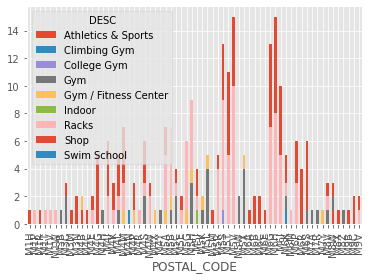

In [20]:
plt.style.use('ggplot')
all_poi.groupby(['POSTAL_CODE','DESC']).size().unstack().plot(kind='bar',stacked=True)
plt.show()

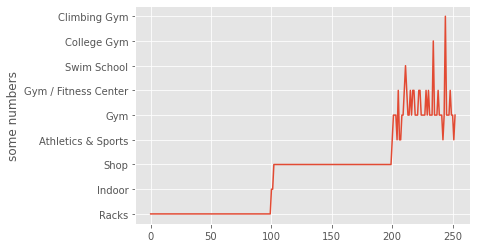

In [21]:
plt.plot(all_poi['DESC'])
plt.ylabel('some numbers')
plt.show()

plot diagram in order to see the relevance and explore visualy data relation of postal code (area) and number capacity (potential number of customers) of the  places  that are in the area


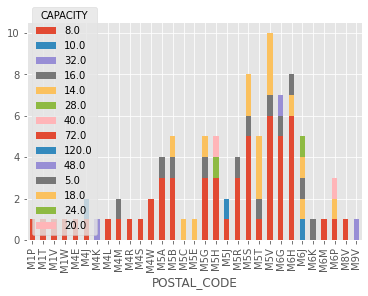

In [22]:
all_poi.groupby(['POSTAL_CODE','CAPACITY']).size().unstack().plot(kind='bar',stacked=True)
plt.show()

### 3.2 Mapping

In [23]:
address = 'Toronto, CA'

geolocator = Nominatim(user_agent="foursquare_agent")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinates of {} are {}, {}.'.format(address,latitude, longitude))

The geograpical coordinates of Toronto, CA are 43.6534817, -79.3839347.


In [24]:
from folium import plugins

# let's start again with a clean copy of the map of San Francisco
all_poi_map = folium.Map(location = [latitude, longitude], zoom_start = 12)

# instantiate a mark cluster object for the incidents in the dataframe
incidents = plugins.MarkerCluster().add_to(all_poi_map)

# loop through the dataframe and add each data point to the mark cluster
for lat, lng, label, in zip(all_poi.Latitude, all_poi.Longitude, all_poi.DESC):
    folium.Marker(
        location=[lat, lng],
        icon=None,
        popup=label,
    ).add_to(incidents)

# display map
all_poi_map

### 3.3 Visualisation Conclusions 

As we can see there is a relationship between the plots Postal code / shops and Postal code / parking spaces. In both of them we can see that same Postal codes have peacks. 
Based on map the visual analysis is harder to find best matching places.

## 4. Methodology 
### Select data based on creteria


### 4.1 Numerical Analysis
Based on two creteria, Capacity of bikes parking and points of interest that attract targeted customers we try to find the best matching of areas. To do that for both DESC - points of interest and CAPACITY - bikes parking we will get the mean values and join the two final table in order to find best matces.

#### grouping data 
Create data set based on that ploting analysis 

In [25]:
#group post code and count of places 
all_poi_plot_1 =all_poi[['POSTAL_CODE','DESC']]
all_poi_plot_1 = all_poi_plot_1.groupby('POSTAL_CODE').count()
#all_poi_plot_1

In [26]:
all_poi_plot_2 =all_poi[['POSTAL_CODE','CAPACITY']]
all_poi_plot_2 = all_poi_plot_2.groupby('POSTAL_CODE').sum()
#all_poi_plot_2

In [27]:
my_places = int(all_poi_plot_1[('DESC')].mean())
my_cap = int(all_poi_plot_2['CAPACITY'].mean())
print('The my_places  mean is {} my_cap  mean is {}.'.format(my_places, my_cap))

The my_places  mean is 3 my_cap  mean is 19.


In [28]:
all_poi_plot_1.apply(lambda x: x.sort_values(ascending=False))
all_poi_group_palces =all_poi_plot_1.apply(lambda x: x.sort_values(ascending=False).head(33))
all_poi_plot_2  = all_poi.groupby(['POSTAL_CODE']).agg({'CAPACITY':sum})
all_poi_plot_2.apply(lambda x: x.sort_values(ascending=False))
#print(all_poi_group)
all_poi_group_capacity =all_poi_plot_2.apply(lambda x: x.sort_values(ascending=False))
#all_poi_group_capacity. 
all_poi_group_capacity =all_poi_group_capacity[(all_poi_group_capacity['CAPACITY'] >= my_cap)]
#print(all_poi_group_capacity.shape)
print('Based on mean values we spot {} areas'.format(all_poi_group_capacity.shape)) 

Based on mean values we spot (16, 1) areas


In [29]:
all_poi_group_palces =all_poi_group_palces[(all_poi_group_palces['DESC'] > my_places)]
#all_poi_group_palces
df_all_poi_plot = pd.merge(all_poi_group_palces, all_poi_group_capacity, on='POSTAL_CODE' )
df_all_poi_plot = df_all_poi_plot.sort_values(by =['CAPACITY'], ascending=[False])
#df_all_poi_plot
df_all_poi_plot.reset_index(level=0, inplace=True)
df_all_poi_plot.dtypes
df_all_poi_DC = df_all_poi_plot
df_all_poi_DC

,POSTAL_CODE,DESC,CAPACITY
0,M5J,4,192.0
1,M5V,15,106.0
2,M6G,13,104.0
3,M5H,9,92.0
4,M5S,13,84.0
5,M6J,10,71.0
6,M6H,15,67.0
7,M5T,11,66.0
8,M5B,7,54.0
9,M5G,6,54.0


In [30]:
##############toronto_merged 
df_all_poi_DC_NA = df_all_poi_DC.join(lat_lng_df.set_index('POSTAL_CODE'), on='POSTAL_CODE')
df_all_poi_DC_NA

,POSTAL_CODE,DESC,CAPACITY,Latitude,Longitude
0,M5J,4,192.0,43.640816,-79.381752
1,M5V,15,106.0,43.628947,-79.394420
2,M6G,13,104.0,43.669542,-79.422564
3,M5H,9,92.0,43.650571,-79.384568
4,M5S,13,84.0,43.662696,-79.400049
5,M6J,10,71.0,43.647927,-79.419750
6,M6H,15,67.0,43.669005,-79.442259
7,M5T,11,66.0,43.653206,-79.400049
8,M5B,7,54.0,43.657162,-79.378937
9,M5G,6,54.0,43.657952,-79.387383


In [31]:
from folium import plugins

# let's start again with a clean copy of the map of San Francisco
all_poi_map = folium.Map(location = [latitude, longitude], zoom_start = 12)

# instantiate a mark cluster object for the incidents in the dataframe
incidents = plugins.MarkerCluster().add_to(all_poi_map)

# loop through the dataframe and add each data point to the mark cluster
for lat, lng, label, in zip(df_all_poi_DC_NA.Latitude, df_all_poi_DC_NA.Longitude, df_all_poi_DC_NA.POSTAL_CODE):
    folium.Marker(
        location=[lat, lng],
        icon=None,
        popup=label,
    ).add_to(incidents)

# display map
all_poi_map

## 4.2 k - means Analysis


### 4.2.1 k - means Analysis - DESC
having again all points of the final data table we will run k means based on points of interest DESC. 


In [32]:
# one hot encoding
toronto_onehot = pd.get_dummies(all_poi[['DESC']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
toronto_onehot['POSTAL_CODE'] = all_poi['POSTAL_CODE'] 

# move neighborhood column to the first column
fixed_columns = [toronto_onehot.columns[-1]] + list(toronto_onehot.columns[:-1])
toronto_onehot = toronto_onehot[fixed_columns]

toronto_onehot.head()

,POSTAL_CODE,Athletics & Sports,Climbing Gym,College Gym,Gym,Gym / Fitness Center,Indoor,Racks,Shop,Swim School
0,M5B,0,0,0,0,0,0,1,0,0
1,M5T,0,0,0,0,0,0,1,0,0
2,M5V,0,0,0,0,0,0,1,0,0
3,M5H,0,0,0,0,0,0,1,0,0
4,M5V,0,0,0,0,0,0,1,0,0


In [33]:
toronto_onehot.shape

(253, 10)

In [34]:
toronto_grouped = toronto_onehot.groupby('POSTAL_CODE').mean().reset_index()
toronto_grouped

,POSTAL_CODE,Athletics & Sports,Climbing Gym,College Gym,Gym,Gym / Fitness Center,Indoor,Racks,Shop,Swim School
0,M1H,1.000000,0.0,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.0
1,M1P,0.000000,0.0,0.000000,0.000000,0.000000,0.00,1.000000,0.000000,0.0
2,M1R,0.000000,0.0,0.000000,0.000000,0.000000,0.00,0.000000,1.000000,0.0
3,M1T,0.000000,0.0,0.000000,0.000000,0.000000,0.00,1.000000,0.000000,0.0
4,M1V,0.000000,0.0,0.000000,0.000000,0.000000,0.00,1.000000,0.000000,0.0
5,M1W,0.000000,0.0,0.000000,0.000000,0.000000,0.00,1.000000,0.000000,0.0
6,M3B,0.000000,0.0,0.000000,1.000000,0.000000,0.00,0.000000,0.000000,0.0
7,M3C,0.000000,0.0,0.000000,0.666667,0.000000,0.00,0.000000,0.333333,0.0
8,M3M,0.000000,0.0,0.000000,0.000000,0.000000,0.00,0.000000,1.000000,0.0
9,M3N,0.500000,0.0,0.000000,0.000000,0.000000,0.00,0.000000,0.500000,0.0


In [35]:
num_top_venues = 10

for hood in toronto_grouped['POSTAL_CODE']:
    print("----"+hood+"----")
    temp = toronto_grouped[toronto_grouped['POSTAL_CODE'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----M1H----
                  venue  freq
0    Athletics & Sports   1.0
1          Climbing Gym   0.0
2           College Gym   0.0
3                   Gym   0.0
4  Gym / Fitness Center   0.0
5                Indoor   0.0
6                 Racks   0.0
7                  Shop   0.0
8           Swim School   0.0


----M1P----
                  venue  freq
0                 Racks   1.0
1    Athletics & Sports   0.0
2          Climbing Gym   0.0
3           College Gym   0.0
4                   Gym   0.0
5  Gym / Fitness Center   0.0
6                Indoor   0.0
7                  Shop   0.0
8           Swim School   0.0


----M1R----
                  venue  freq
0                  Shop   1.0
1    Athletics & Sports   0.0
2          Climbing Gym   0.0
3           College Gym   0.0
4                   Gym   0.0
5  Gym / Fitness Center   0.0
6                Indoor   0.0
7                 Racks   0.0
8           Swim School   0.0


----M1T----
                  venue  freq
0               

In [36]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [37]:
num_top_venues = 6
indicators = ['st', 'nd', 'rd']
# create columns according to number of top venues
columns = ['POSTAL_CODE']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['POSTAL_CODE'] = toronto_grouped['POSTAL_CODE']

for ind in np.arange(toronto_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(toronto_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted

,POSTAL_CODE,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue
0,M1H,Athletics & Sports,Swim School,Shop,Racks,Indoor,Gym / Fitness Center
1,M1P,Racks,Swim School,Shop,Indoor,Gym / Fitness Center,Gym
2,M1R,Shop,Swim School,Racks,Indoor,Gym / Fitness Center,Gym
3,M1T,Racks,Swim School,Shop,Indoor,Gym / Fitness Center,Gym
4,M1V,Racks,Swim School,Shop,Indoor,Gym / Fitness Center,Gym
5,M1W,Racks,Swim School,Shop,Indoor,Gym / Fitness Center,Gym
6,M3B,Gym,Swim School,Shop,Racks,Indoor,Gym / Fitness Center
7,M3C,Gym,Shop,Swim School,Racks,Indoor,Gym / Fitness Center
8,M3M,Shop,Swim School,Racks,Indoor,Gym / Fitness Center,Gym
9,M3N,Shop,Athletics & Sports,Swim School,Racks,Indoor,Gym / Fitness Center


### 4.2.1.1 Cluster Neighborhoods

In [38]:
# set number of clusters -all_poi 
kclusters = 10
toronto_grouped_clustering = toronto_grouped.drop('POSTAL_CODE', 1)
# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(toronto_grouped_clustering)
# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([7, 1, 0, 1, 1, 1, 2, 5, 0, 5])

In [39]:
#all_poi
#print(df_all_poi_DC.count())
#print(neighborhoods_venues_sorted.count())
#print(mtoronto_grouped.count())
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)
##### here - gregt
toronto_merged = toronto_grouped
#print(toronto_merged)
# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
toronto_merged = toronto_merged.join(neighborhoods_venues_sorted.set_index('POSTAL_CODE'), on='POSTAL_CODE')

toronto_merged.head() # check the last columns!

,POSTAL_CODE,Athletics & Sports,Climbing Gym,College Gym,Gym,Gym / Fitness Center,Indoor,Racks,Shop,Swim School,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue
0,M1H,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7,Athletics & Sports,Swim School,Shop,Racks,Indoor,Gym / Fitness Center
1,M1P,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1,Racks,Swim School,Shop,Indoor,Gym / Fitness Center,Gym
2,M1R,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0,Shop,Swim School,Racks,Indoor,Gym / Fitness Center,Gym
3,M1T,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1,Racks,Swim School,Shop,Indoor,Gym / Fitness Center,Gym
4,M1V,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1,Racks,Swim School,Shop,Indoor,Gym / Fitness Center,Gym


In [40]:
toronto_merged_final = toronto_merged.join(lat_lng_df.set_index('POSTAL_CODE'), on='POSTAL_CODE')
#toronto_merged_final

In [41]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(toronto_merged_final['Latitude'], toronto_merged_final['Longitude'], toronto_merged_final['POSTAL_CODE'], toronto_merged_final['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [42]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 0,  toronto_merged.columns[[0]   + list(range(10, toronto_merged.shape[1]))]]

,POSTAL_CODE,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue
2,M1R,0,Shop,Swim School,Racks,Indoor,Gym / Fitness Center,Gym
8,M3M,0,Shop,Swim School,Racks,Indoor,Gym / Fitness Center,Gym
13,M4G,0,Shop,Swim School,Racks,Indoor,Gym / Fitness Center,Gym
20,M4P,0,Shop,Gym / Fitness Center,Swim School,Racks,Indoor,Gym
35,M5M,0,Shop,Swim School,Racks,Indoor,Gym / Fitness Center,Gym
43,M6B,0,Shop,Swim School,Racks,Indoor,Gym / Fitness Center,Gym
44,M6C,0,Shop,Swim School,Racks,Indoor,Gym / Fitness Center,Gym
45,M6E,0,Shop,Swim School,Racks,Indoor,Gym / Fitness Center,Gym
52,M6R,0,Shop,Swim School,Racks,Indoor,Gym / Fitness Center,Gym
53,M6S,0,Shop,Gym,Swim School,Racks,Indoor,Gym / Fitness Center


In [43]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 1,  toronto_merged.columns[[0]   + list(range(11, toronto_merged.shape[1]))]]

,POSTAL_CODE,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue
1,M1P,Racks,Swim School,Shop,Indoor,Gym / Fitness Center,Gym
3,M1T,Racks,Swim School,Shop,Indoor,Gym / Fitness Center,Gym
4,M1V,Racks,Swim School,Shop,Indoor,Gym / Fitness Center,Gym
5,M1W,Racks,Swim School,Shop,Indoor,Gym / Fitness Center,Gym
21,M4R,Racks,Swim School,Shop,Indoor,Gym / Fitness Center,Gym
27,M5B,Racks,Gym / Fitness Center,Gym,Swim School,Shop,Indoor
30,M5G,Racks,Gym / Fitness Center,Swim School,Shop,Indoor,Gym
31,M5H,Racks,Gym,Gym / Fitness Center,Swim School,Shop,Indoor
36,M5R,Racks,Shop,Swim School,Indoor,Gym / Fitness Center,Gym
50,M6M,Racks,Swim School,Shop,Indoor,Gym / Fitness Center,Gym


In [44]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 2,  toronto_merged.columns[[0]   + list(range(10, toronto_merged.shape[1]))]]

,POSTAL_CODE,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue
6,M3B,2,Gym,Swim School,Shop,Racks,Indoor,Gym / Fitness Center
14,M4H,2,Gym,Swim School,Shop,Racks,Indoor,Gym / Fitness Center
25,M4Y,2,Gym,Swim School,Shop,Racks,Indoor,Gym / Fitness Center
34,M5L,2,Gym,Gym / Fitness Center,Swim School,Shop,Racks,Indoor
40,M5W,2,Gym,Swim School,Shop,Racks,Indoor,Gym / Fitness Center
41,M5X,2,Gym,Gym / Fitness Center,Swim School,Shop,Racks,Indoor
54,M7A,2,Gym,Swim School,Shop,Racks,Indoor,Gym / Fitness Center
55,M7R,2,Gym,Swim School,Shop,Racks,Indoor,Gym / Fitness Center
60,M8Z,2,Gym,Swim School,Shop,Racks,Indoor,Gym / Fitness Center


In [45]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 3,  toronto_merged.columns[[0]   + list(range(10, toronto_merged.shape[1]))]]

,POSTAL_CODE,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue
10,M4B,3,Gym / Fitness Center,Athletics & Sports,Swim School,Shop,Racks,Indoor


In [46]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 4,  toronto_merged.columns[[0]   + list(range(10, toronto_merged.shape[1]))]]

,POSTAL_CODE,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue
12,M4E,4,Shop,Racks,Swim School,Indoor,Gym / Fitness Center,Gym
15,M4J,4,Shop,Racks,Swim School,Indoor,Gym / Fitness Center,Gym
16,M4K,4,Shop,Racks,Swim School,Indoor,Gym / Fitness Center,Gym
18,M4M,4,Shop,Racks,Gym / Fitness Center,Swim School,Indoor,Gym
23,M4W,4,Racks,Shop,Swim School,Indoor,Gym / Fitness Center,Gym
26,M5A,4,Racks,Shop,Gym / Fitness Center,Swim School,Indoor,Gym
29,M5E,4,Shop,Racks,Swim School,Indoor,Gym / Fitness Center,Gym
32,M5J,4,Shop,Racks,Indoor,Swim School,Gym / Fitness Center,Gym
37,M5S,4,Racks,Shop,College Gym,Swim School,Indoor,Gym / Fitness Center
38,M5T,4,Shop,Racks,Swim School,Indoor,Gym / Fitness Center,Gym


In [47]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 5,  toronto_merged.columns[[0]   + list(range(10, toronto_merged.shape[1]))]]

,POSTAL_CODE,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue
7,M3C,5,Gym,Shop,Swim School,Racks,Indoor,Gym / Fitness Center
9,M3N,5,Shop,Athletics & Sports,Swim School,Racks,Indoor,Gym / Fitness Center
17,M4L,5,Shop,Racks,Gym,Swim School,Indoor,Gym / Fitness Center
22,M4S,5,Shop,Gym,Racks,Swim School,Indoor,Gym / Fitness Center
28,M5C,5,Gym,Shop,Racks,Swim School,Indoor,Gym / Fitness Center
49,M6K,5,Shop,Racks,Gym,Climbing Gym,Swim School,Indoor
57,M8V,5,Shop,Racks,Gym,Swim School,Indoor,Gym / Fitness Center
58,M8W,5,Shop,Gym,Athletics & Sports,Swim School,Racks,Indoor


In [48]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 6,  toronto_merged.columns[[0]   + list(range(10, toronto_merged.shape[1]))]]

,POSTAL_CODE,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue
19,M4N,6,Swim School,Shop,Racks,Indoor,Gym / Fitness Center,Gym


In [49]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 7,  toronto_merged.columns[[0]   + list(range(10, toronto_merged.shape[1]))]]

,POSTAL_CODE,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue
0,M1H,7,Athletics & Sports,Swim School,Shop,Racks,Indoor,Gym / Fitness Center
11,M4C,7,Athletics & Sports,Swim School,Shop,Racks,Indoor,Gym / Fitness Center
42,M6A,7,Athletics & Sports,Swim School,Shop,Racks,Indoor,Gym / Fitness Center


In [50]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 8,  toronto_merged.columns[[0]   + list(range(10, toronto_merged.shape[1]))]]

,POSTAL_CODE,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue
24,M4X,8,Gym / Fitness Center,Swim School,Shop,Racks,Indoor,Gym
56,M7Y,8,Gym / Fitness Center,Swim School,Shop,Racks,Indoor,Gym


In [51]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 9,  toronto_merged.columns[[0]   + list(range(10, toronto_merged.shape[1]))]]

,POSTAL_CODE,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue
33,M5K,9,Gym / Fitness Center,Gym,Swim School,Shop,Racks,Indoor


In [52]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 10,  toronto_merged.columns[[0]   + list(range(10, toronto_merged.shape[1]))]]

,POSTAL_CODE,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue


### 4.2.2 kmenas - capacity

In [53]:
# one hot encoding
toronto2_onehot = pd.get_dummies(all_poi[['CAPACITY']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
toronto2_onehot['POSTAL_CODE'] = all_poi['POSTAL_CODE'] 

# move neighborhood column to the first column
fixed_columns = [toronto2_onehot.columns[-1]] + list(toronto2_onehot.columns[:-1])
toronto2_onehot = toronto2_onehot[fixed_columns]

toronto2_onehot.head()

,POSTAL_CODE,CAPACITY
0,M5B,14.0
1,M5T,14.0
2,M5V,14.0
3,M5H,28.0
4,M5V,14.0


In [54]:
toronto2_grouped = toronto2_onehot.groupby('POSTAL_CODE').mean().reset_index()
toronto2_grouped.dropna(inplace=True)
#toronto2_grouped

In [55]:
num_top_venues = 5

for hood in toronto2_grouped['POSTAL_CODE']:
    print("----"+hood+"----")
    temp = toronto2_grouped[toronto2_grouped['POSTAL_CODE'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----M1P----
      venue  freq
0  CAPACITY   8.0


----M1T----
      venue  freq
0  CAPACITY   8.0


----M1V----
      venue  freq
0  CAPACITY   8.0


----M1W----
      venue  freq
0  CAPACITY   8.0


----M4E----
      venue  freq
0  CAPACITY   8.0


----M4J----
      venue  freq
0  CAPACITY   9.0


----M4K----
      venue  freq
0  CAPACITY  32.0


----M4L----
      venue  freq
0  CAPACITY   8.0


----M4M----
      venue  freq
0  CAPACITY  12.0


----M4R----
      venue  freq
0  CAPACITY   8.0


----M4S----
      venue  freq
0  CAPACITY   8.0


----M4W----
      venue  freq
0  CAPACITY   8.0


----M5A----
      venue  freq
0  CAPACITY  10.0


----M5B----
      venue  freq
0  CAPACITY  10.8


----M5C----
      venue  freq
0  CAPACITY  14.0


----M5E----
      venue  freq
0  CAPACITY  14.0


----M5G----
      venue  freq
0  CAPACITY  10.8


----M5H----
      venue  freq
0  CAPACITY  18.4


----M5J----
      venue  freq
0  CAPACITY  96.0


----M5R----
      venue  freq
0  CAPACITY  10.0




In [56]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [57]:
num_top_venues = 2
indicators = ['st', 'nd', 'rd']
# create columns according to number of top venues
columns = ['POSTAL_CODE']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['POSTAL_CODE'] = toronto2_grouped['POSTAL_CODE']

for ind in np.arange(toronto2_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(toronto2_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted

,POSTAL_CODE,1st Most Common Venue,2nd Most Common Venue
1,M1P,CAPACITY,CAPACITY
3,M1T,CAPACITY,CAPACITY
4,M1V,CAPACITY,CAPACITY
5,M1W,CAPACITY,CAPACITY
12,M4E,CAPACITY,CAPACITY
15,M4J,CAPACITY,CAPACITY
16,M4K,CAPACITY,CAPACITY
17,M4L,CAPACITY,CAPACITY
18,M4M,CAPACITY,CAPACITY
21,M4R,CAPACITY,CAPACITY


#### 4.2.2.2 Cluster Neighborhoods

In [58]:
# set number of clusters -all_poi
 
kclusters = 5
toronto2_grouped_clustering = toronto2_grouped.drop('POSTAL_CODE', 1)
# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(toronto2_grouped_clustering)
# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([3, 3, 3, 3, 3, 3, 2, 3, 0, 3])

In [59]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)
toronto2_merged = toronto2_grouped
toronto2_merged = toronto2_merged.join(neighborhoods_venues_sorted.set_index('POSTAL_CODE'), on='POSTAL_CODE')
toronto2_merged.head() # check the last columns!

,POSTAL_CODE,CAPACITY,Cluster Labels,1st Most Common Venue,2nd Most Common Venue
1,M1P,8.0,3,CAPACITY,CAPACITY
3,M1T,8.0,3,CAPACITY,CAPACITY
4,M1V,8.0,3,CAPACITY,CAPACITY
5,M1W,8.0,3,CAPACITY,CAPACITY
12,M4E,8.0,3,CAPACITY,CAPACITY


In [60]:
## add lat lont to the table
#lat_lng_df=pd.read_csv('http://cocl.us/Geospatial_data')
#lat_lng_df.rename(columns={'Postal Code':'POSTAL_CODE'},inplace=True)
#lat_lng_df

In [61]:
#toronto2_merged 
toronto2_merged_final = toronto2_merged.join(lat_lng_df.set_index('POSTAL_CODE'), on='POSTAL_CODE')
toronto2_merged_final.head()

,POSTAL_CODE,CAPACITY,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,Latitude,Longitude
1,M1P,8.0,3,CAPACITY,CAPACITY,43.757410,-79.273304
3,M1T,8.0,3,CAPACITY,CAPACITY,43.781638,-79.304302
4,M1V,8.0,3,CAPACITY,CAPACITY,43.815252,-79.284577
5,M1W,8.0,3,CAPACITY,CAPACITY,43.799525,-79.318389
12,M4E,8.0,3,CAPACITY,CAPACITY,43.676357,-79.293031


In [62]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(toronto2_merged_final['Latitude'], toronto2_merged_final['Longitude'], toronto2_merged_final['POSTAL_CODE'], toronto2_merged_final['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [63]:
toronto2_merged.loc[toronto2_merged['Cluster Labels'] == 0,  toronto2_merged.columns[[0,1,2]  + list(range(3, toronto2_merged.shape[1]))]]

,POSTAL_CODE,CAPACITY,Cluster Labels,1st Most Common Venue,2nd Most Common Venue
18,M4M,12.0,0,CAPACITY,CAPACITY
26,M5A,10.0,0,CAPACITY,CAPACITY
27,M5B,10.8,0,CAPACITY,CAPACITY
30,M5G,10.8,0,CAPACITY,CAPACITY
36,M5R,10.0,0,CAPACITY,CAPACITY
37,M5S,10.5,0,CAPACITY,CAPACITY
39,M5V,10.6,0,CAPACITY,CAPACITY


In [64]:
toronto2_merged.loc[toronto2_merged['Cluster Labels'] == 1,   toronto2_merged.columns[[0,1,2]  + list(range(3, toronto2_merged.shape[1]))]]

,POSTAL_CODE,CAPACITY,Cluster Labels,1st Most Common Venue,2nd Most Common Venue
32,M5J,96.0,1,CAPACITY,CAPACITY


In [65]:
toronto2_merged.loc[toronto2_merged['Cluster Labels'] == 2,   toronto2_merged.columns[[0,1,2]   + list(range(3, toronto2_merged.shape[1]))]]

,POSTAL_CODE,CAPACITY,Cluster Labels,1st Most Common Venue,2nd Most Common Venue
16,M4K,32.0,2,CAPACITY,CAPACITY
63,M9V,32.0,2,CAPACITY,CAPACITY


In [66]:
toronto2_merged.loc[toronto2_merged['Cluster Labels'] == 3,  toronto2_merged.columns[[0,1,2]  + list(range(3, toronto2_merged.shape[1]))]]

,POSTAL_CODE,CAPACITY,Cluster Labels,1st Most Common Venue,2nd Most Common Venue
1,M1P,8.000,3,CAPACITY,CAPACITY
3,M1T,8.000,3,CAPACITY,CAPACITY
4,M1V,8.000,3,CAPACITY,CAPACITY
5,M1W,8.000,3,CAPACITY,CAPACITY
12,M4E,8.000,3,CAPACITY,CAPACITY
15,M4J,9.000,3,CAPACITY,CAPACITY
17,M4L,8.000,3,CAPACITY,CAPACITY
21,M4R,8.000,3,CAPACITY,CAPACITY
22,M4S,8.000,3,CAPACITY,CAPACITY
23,M4W,8.000,3,CAPACITY,CAPACITY


In [67]:
toronto2_merged.loc[toronto2_merged['Cluster Labels'] == 4,   toronto2_merged.columns[[0,1,2]   + list(range(3, toronto2_merged.shape[1]))]]

,POSTAL_CODE,CAPACITY,Cluster Labels,1st Most Common Venue,2nd Most Common Venue
28,M5C,14.000000,4,CAPACITY,CAPACITY
29,M5E,14.000000,4,CAPACITY,CAPACITY
31,M5H,18.400000,4,CAPACITY,CAPACITY
38,M5T,13.200000,4,CAPACITY,CAPACITY
46,M6G,14.857143,4,CAPACITY,CAPACITY
48,M6J,14.200000,4,CAPACITY,CAPACITY
49,M6K,16.000000,4,CAPACITY,CAPACITY
51,M6P,14.000000,4,CAPACITY,CAPACITY


In [68]:
toronto2_merged.loc[toronto2_merged['Cluster Labels'] == 5,   toronto2_merged.columns[[0,1,2]   + list(range(3, toronto2_merged.shape[1]))]]

,POSTAL_CODE,CAPACITY,Cluster Labels,1st Most Common Venue,2nd Most Common Venue


## 5. Analyze all clusters


Compare methods analyse results

capacity vs DESC
which cluster to select


In [69]:
#print(df_all_poi_DC)
print('------------------')
print(toronto2_merged.loc[toronto2_merged['Cluster Labels'] == 4,   toronto2_merged.columns[[0]  ]])
print('------------------')
print(toronto_merged.loc[toronto_merged['Cluster Labels'] == 1,  toronto_merged.columns[[0]  ]])



------------------
   POSTAL_CODE
28         M5C
29         M5E
31         M5H
38         M5T
46         M6G
48         M6J
49         M6K
51         M6P
------------------
   POSTAL_CODE
1          M1P
3          M1T
4          M1V
5          M1W
21         M4R
27         M5B
30         M5G
31         M5H
36         M5R
50         M6M


In [86]:
to_2= (toronto2_merged.loc[toronto2_merged['Cluster Labels'] == 4,   toronto2_merged.columns[[0,2]  ]])
to_1 =(toronto_merged.loc[toronto_merged['Cluster Labels'] == 4,  toronto_merged.columns[[0,10]  ]])
to_n = df_all_poi_DC
mergedStuff = pd.merge(to_n, to_1, on=['POSTAL_CODE'], how='inner')
mergedStuff = pd.merge(to_1, to_2, on=['POSTAL_CODE'], how='inner')

In [88]:
mergedStuff

,POSTAL_CODE,Cluster Labels_x,Cluster Labels_y
0,M5E,4,4
1,M5T,4,4
2,M6G,4,4
3,M6J,4,4
4,M6P,4,4


In [89]:
mergedStuff = pd.merge(to_1, to_2, on=['POSTAL_CODE'], how='inner')
mergedStuff

,POSTAL_CODE,Cluster Labels_x,Cluster Labels_y
0,M5E,4,4
1,M5T,4,4
2,M6G,4,4
3,M6J,4,4
4,M6P,4,4


In [90]:
mergedStuff = pd.merge(mergedStuff, lat_lng_df, on=['POSTAL_CODE'], how='inner')
mergedStuff

,POSTAL_CODE,Cluster Labels_x,Cluster Labels_y,Latitude,Longitude
0,M5E,4,4,43.644771,-79.373306
1,M5T,4,4,43.653206,-79.400049
2,M6G,4,4,43.669542,-79.422564
3,M6J,4,4,43.647927,-79.419750
4,M6P,4,4,43.661608,-79.464763


In [91]:
#toronto2_merged_final
# let's start again with a clean copy of the map of San Francisco
all_poi_map = folium.Map(location = [latitude, longitude], zoom_start = 12)

# instantiate a mark cluster object for the incidents in the dataframe
incidents = plugins.MarkerCluster().add_to(all_poi_map)
incidents2 = plugins.MarkerCluster().add_to(all_poi_map)

# loop through the dataframe and add each data point to the mark cluster
for lat, lng, label in zip(mergedStuff.Latitude, mergedStuff.Longitude, mergedStuff.POSTAL_CODE):
    folium.Marker(
        location=[lat, lng],
        icon=None,
        popup=label,
    ).add_to(incidents)

   # display map
all_poi_map

### Post codes to Avoid

In [92]:
df_Avoid = GR_venues.loc[(GR_venues['Venue Category'].str.contains('Salad')) | (GR_venues['Venue Category'].str.contains('Juice'))
                         | (GR_venues['Venue Category'].str.contains('Smoothie'))]

df_Avoid

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
106,M2J,43.778517,-79.346556,Booster Juice,43.777428,-79.344970,Juice Bar
113,M2J,43.778517,-79.346556,Ten Ren's Tea Time,43.777158,-79.344531,Juice Bar
178,M2N,43.770120,-79.408493,Booster Juice,43.768890,-79.412990,Juice Bar
324,M4G,43.709060,-79.363452,Booster Juice,43.706173,-79.360652,Smoothie Shop
382,M4K,43.679557,-79.352188,The Big Carrot Organic Juice Bar,43.677438,-79.352683,Juice Bar
605,M4Y,43.665860,-79.383160,FUEL+,43.664399,-79.380427,Juice Bar
784,M5B,43.657162,-79.378937,Booster Juice,43.656318,-79.382765,Juice Bar
945,M5E,43.644771,-79.373306,Evolution Food Co,43.648468,-79.371715,Juice Bar
987,M5G,43.657952,-79.387383,Booster Juice,43.660323,-79.385445,Juice Bar
990,M5G,43.657952,-79.387383,freshii,43.661286,-79.383964,Salad Place


In [94]:
df_EXclude_DF =  pd.DataFrame(df_Avoid,columns = ['Neighborhood','Neighborhood Latitude','Neighborhood Longitude','Venue Category'])
df_EXclude_DF.rename(columns={'Neighborhood':'POSTAL_CODE'},inplace=True)
df_EXclude_DF.rename(columns={'Neighborhood Latitude':'Latitude'},inplace=True)
df_EXclude_DF.rename(columns={'Neighborhood Longitude':'Longitude'},inplace=True)
df_EXclude_DF.rename(columns={'Venue Category':'DESC'},inplace=True)
df_EXclude_DF.head()

,POSTAL_CODE,Latitude,Longitude,DESC
106,M2J,43.778517,-79.346556,Juice Bar
113,M2J,43.778517,-79.346556,Juice Bar
178,M2N,43.770120,-79.408493,Juice Bar
324,M4G,43.709060,-79.363452,Smoothie Shop
382,M4K,43.679557,-79.352188,Juice Bar


# Next steps


- Set more criteria
- The fact that  @ our final post code locations Juice bars exist doesn’t mean that another one can open as well. 
- Μore data
  - Population 
  - Add more data 
  - Foursquare rating 
- Add weight on data criteria 